In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [35]:
data=pd.read_csv('salary.csv',sep=',')
data.columns=['age','workclass','fnlwgt','education','ecducation_num','marital_status','occupatin','relationship','race','gender','capital_gain','capital_loss','hours-per-week','native_country','income']
data.head()

,age,workclass,fnlwgt,education,ecducation_num,marital_status,occupatin,relationship,race,gender,capital_gain,capital_loss,hours-per-week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [36]:
data.tail()

,age,workclass,fnlwgt,education,ecducation_num,marital_status,occupatin,relationship,race,gender,capital_gain,capital_loss,hours-per-week,native_country,income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
le=LabelEncoder()

In [39]:
for col in data.columns:
    if data[col].dtypes=='object':
        data[col]=le.fit_transform(data[col])

In [40]:
data.head()

,age,workclass,fnlwgt,education,ecducation_num,marital_status,occupatin,relationship,race,gender,capital_gain,capital_loss,hours-per-week,native_country,income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


In [41]:
df=pd.DataFrame(data=data)
df.head()

,age,workclass,fnlwgt,education,ecducation_num,marital_status,occupatin,relationship,race,gender,capital_gain,capital_loss,hours-per-week,native_country,income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


In [42]:
df.tail()

,age,workclass,fnlwgt,education,ecducation_num,marital_status,occupatin,relationship,race,gender,capital_gain,capital_loss,hours-per-week,native_country,income
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0
32559,52,5,287927,11,9,2,4,5,4,0,15024,0,40,39,1


In [43]:
df.shape

(32560, 15)

In [44]:
df.dtypes

age               int64
workclass         int32
fnlwgt            int64
education         int32
ecducation_num    int64
marital_status    int32
occupatin         int32
relationship      int32
race              int32
gender            int32
capital_gain      int64
capital_loss      int64
hours-per-week    int64
native_country    int32
income            int32
dtype: object

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
age               32560 non-null int64
workclass         32560 non-null int32
fnlwgt            32560 non-null int64
education         32560 non-null int32
ecducation_num    32560 non-null int64
marital_status    32560 non-null int32
occupatin         32560 non-null int32
relationship      32560 non-null int32
race              32560 non-null int32
gender            32560 non-null int32
capital_gain      32560 non-null int64
capital_loss      32560 non-null int64
hours-per-week    32560 non-null int64
native_country    32560 non-null int32
income            32560 non-null int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


In [46]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'ecducation_num',
       'marital_status', 'occupatin', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours-per-week', 'native_country',
       'income'],
      dtype='object')

In [47]:
df.describe()

,age,workclass,fnlwgt,education,ecducation_num,marital_status,occupatin,relationship,race,gender,capital_gain,capital_loss,hours-per-week,native_country,income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [62]:
#df['age'].plot.bar()

In [63]:
#df['age'].plot.box()

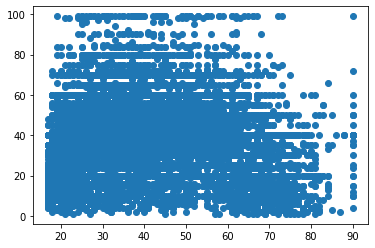

In [64]:
plt.scatter(df['age'],df['hours-per-week'])
plt.show()

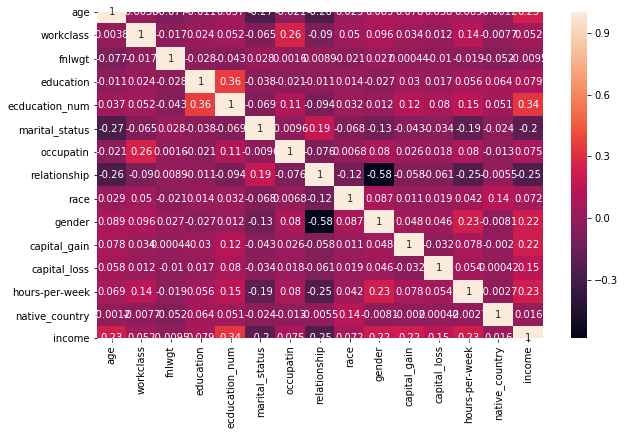

In [65]:
acc_hmap=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(acc_hmap,annot=True)
plt.show()

In [66]:
df.isnull()

,age,workclass,fnlwgt,education,ecducation_num,marital_status,occupatin,relationship,race,gender,capital_gain,capital_loss,hours-per-week,native_country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [67]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
ecducation_num    0
marital_status    0
occupatin         0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours-per-week    0
native_country    0
income            0
dtype: int64

In [68]:
x=df.iloc[:,0:-1]
x.shape

(32560, 14)

In [69]:
y=df.iloc[:,-1]

In [70]:
y.shape

(32560,)

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scale=StandardScaler()

x=scale.fit_transform(x)

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=45)

In [93]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
lg.score(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg)) 
print(classification_report(y_test,predlg))

0.8329145728643216
[[5159  296]
 [ 901  808]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      5455
           1       0.73      0.47      0.57      1709

    accuracy                           0.83      7164
   macro avg       0.79      0.71      0.74      7164
weighted avg       0.82      0.83      0.82      7164



In [76]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb)) 
print(classification_report(y_test,predgnb))

0.8103015075376885
[[5189  266]
 [1093  616]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.88      5455
           1       0.70      0.36      0.48      1709

    accuracy                           0.81      7164
   macro avg       0.76      0.66      0.68      7164
weighted avg       0.80      0.81      0.79      7164



In [77]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt)) 
print(classification_report(y_test,preddt))

0.8132328308207705
[[4739  716]
 [ 622 1087]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      5455
           1       0.60      0.64      0.62      1709

    accuracy                           0.81      7164
   macro avg       0.74      0.75      0.75      7164
weighted avg       0.82      0.81      0.81      7164



In [92]:
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc)) 
print(classification_report(y_test,predsvc))

0.8566443327749861
[[5164  291]
 [ 736  973]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      5455
           1       0.77      0.57      0.65      1709

    accuracy                           0.86      7164
   macro avg       0.82      0.76      0.78      7164
weighted avg       0.85      0.86      0.85      7164



In [79]:
gnb=GaussianNB()
score=cross_val_score(gnb,x,y,cv=5)
print('Score:',score)

print('Mean value:',score.mean())
print('Standard deviation:',score.std())

y_pred=cross_val_predict(gnb,x,y,cv=5)

print('Y prediction value')
print(y_pred)

conf_mat=confusion_matrix(y,y_pred)
conf_mat

Score: [0.80147398 0.80113636 0.80589681 0.79745086 0.81185686]
Mean value: 0.8035629724472513
Standard deviation: 0.004936508264273276
Y prediction value
[0 0 0 ... 0 0 1]


array([[23522,  1197],
       [ 5199,  2642]], dtype=int64)

In [91]:
svc=SVC()

score=cross_val_score(svc,x,y,cv=5,scoring='accuracy')           # Default value of scoring=accuracy
print('Score:',score)
print('Mean value:',score.mean())
print('Standard deviation:',score.std())

y_pred=cross_val_predict(svc,x,y,cv=5)
print('Y prediction value:')
print(y_pred)

conf_mat=confusion_matrix(y,y_pred)
conf_mat

Score: [0.84246891 0.84766585 0.84797297 0.85426904 0.84902473]
Mean value: 0.8482802996258922
Standard deviation: 0.0037593476758135515
Y prediction value:
[0 0 0 ... 0 0 1]


array([[23346,  1373],
       [ 3567,  4274]], dtype=int64)

In [81]:
from sklearn.model_selection import GridSearchCV

dtc=DecisionTreeClassifier()

para={'criterion':['gini','entropy']}

gr_sr=GridSearchCV(estimator=dtc,param_grid=para,scoring='accuracy',cv=5)

In [82]:
gr_sr.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,


In [83]:
best_parameters=gr_sr.best_params_
print(best_parameters)
best_result=gr_sr.best_score_
print(best_result)

{'criterion': 'entropy'}
0.8109938573003622


In [87]:
rf=RandomForestClassifier(n_estimators=200,random_state=45)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=45, verbose=0,
                       warm_start=False)

In [88]:
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8644611948632049
[[5082  373]
 [ 598 1111]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      5455
           1       0.75      0.65      0.70      1709

    accuracy                           0.86      7164
   macro avg       0.82      0.79      0.80      7164
weighted avg       0.86      0.86      0.86      7164



In [89]:
from sklearn.externals import joblib

joblib.dump(lg,'salaryfile.obj')

['salaryfile.obj']